<a href="https://colab.research.google.com/github/JMian/phdtask/blob/main/Jia_Mian_Tan_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries and functions

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from scipy.interpolate import CubicHermiteSpline
from sympy import symbols, diff, Eq, solve, exp
import sympy as sp

# reproduce 40 GPa of Deng and Lee (2017), can skip

In [2]:
R = 8.314
TmeltMgO40GPa = 5887
TmeltFeO40GPa = (2617+2687)/2
deltaHMgO = 55000
deltaHFeO = 49000
Wliquid = -10000
Wsolid = 25000
######## ideal
# deltaHMgO = 43000
# deltaHFeO = 100000
# Wliquid = 0
# Wsolid = 0

In [3]:
def T1(Xliquid, Xsolid):
  t1 = (Wsolid*(Xsolid)**2 - Wliquid*(Xliquid)**2 - deltaHFeO) / (R*np.log((1-Xliquid)/(1-Xsolid)) - deltaHFeO/TmeltFeO40GPa)
  return t1

def T2(Xliquid, Xsolid):
  t2 = (Wsolid*(1-Xsolid)**2 - Wliquid*(1-Xliquid)**2 - deltaHMgO) / (R*np.log(Xliquid/Xsolid) - deltaHMgO/TmeltMgO40GPa)
  return t2

<ipython-input-4-8cec9b6e47b3>:20: RuntimeWarning: invalid value encountered in log
  eq1 = deltaHFeO*(1-T/TmeltFeO40GPa) + Wliquid*(Xliquid)**2 - Wsolid*(Xsolid)**2 + R*T*np.log((1-Xliquid)/(1-Xsolid))


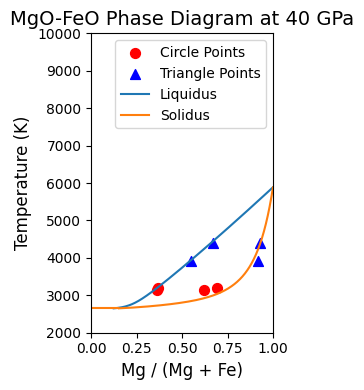

In [4]:
fig, ax = plt.subplots(figsize=(3, 4))
x_min, x_max = 0, 1  # Mg/(Mg + Fe)
y_min, y_max = 2000, 10000  # Temperature in Kelvin
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xlabel('Mg / (Mg + Fe)', fontsize=12)
ax.set_ylabel('Temperature (K)', fontsize=12)
ax.set_title('MgO-FeO Phase Diagram at 40 GPa', fontsize=14)

x_circle = [0.36, 0.62, 0.37, 0.69]
y_circle = [3150, 3150, 3200, 3200]
x_triangle = [0.67, 0.93, 0.55, 0.92]
y_triangle = [4400, 4400, 3910, 3910]

ax.scatter(x_circle, y_circle, marker='o', color='red', label='Circle Points', s=50)
ax.scatter(x_triangle, y_triangle, marker='^', color='blue', label='Triangle Points', s=50)

def equations(vars, T):
  Xliquid, Xsolid = vars
  eq1 = deltaHFeO*(1-T/TmeltFeO40GPa) + Wliquid*(Xliquid)**2 - Wsolid*(Xsolid)**2 + R*T*np.log((1-Xliquid)/(1-Xsolid))
  eq2 = deltaHMgO*(1-T/TmeltMgO40GPa) + Wliquid*(1-Xliquid)**2 - Wsolid*(1-Xsolid)**2 + R*T*np.log(Xliquid/Xsolid)
  return [eq1, eq2]

T_range = np.arange(TmeltFeO40GPa, TmeltMgO40GPa, 10)
X_liquidus = []
X_solidus = []

for T in T_range:
    # Initial guesses
    XMgO = 0.0001
    guess = [XMgO, 1-XMgO]
    Xliquid, Xsolid = fsolve(equations, guess, args=(T,))
    X_liquidus.append(Xliquid)
    X_solidus.append(Xsolid)

ax.plot(X_liquidus, T_range, label="Liquidus", color='tab:blue')
ax.plot(X_solidus, T_range, label="Solidus", color='tab:orange')
entire_solid = np.arange(0, X_solidus[0], 0.01)
ax.plot(entire_solid, [TmeltFeO40GPa]*len(entire_solid), color='tab:orange')

plt.legend()
plt.tight_layout()
plt.show()

# to retrieve \Delta S_{m,MgO} at 80GPa of Deng et al. (2019), can skip

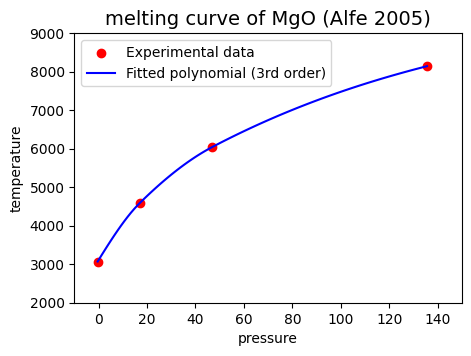

In [5]:
x = np.array([-0.4, 17, 47, 135.6])    # data from Alfe (2005)
y = np.array([3070, 4590, 6047, 8144])
slopes = np.array([102, 62, 33, 16])

hermite_spline = CubicHermiteSpline(x, y, slopes)
x_fit = np.linspace(min(x), max(x), 100)
y_fit = hermite_spline(x_fit)

fig, ax = plt.subplots(figsize=(5, 3.5))
x_min, x_max = -10, 150
y_min, y_max = 2000, 9000
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.scatter(x, y, color='red', label='Experimental data')
ax.plot(x_fit, y_fit, label='Fitted polynomial (3rd order)', color='blue')
ax.set_xlabel('pressure')
ax.set_ylabel('temperature')
ax.set_title('melting curve of MgO (Alfe 2005)', fontsize=14)
plt.legend()
plt.show()

In [6]:
p_range = [27, 40, 50, 60, 80, 136, 11]
melt_MgO = hermite_spline(p_range)
print(melt_MgO)

[5169.96296296 5787.90303704 6144.88879927 6455.49228457 7008.46852691
 8150.3891702  4151.01734388]


In [7]:
deltaS_MgO80 = 24000/7008.47
print(deltaS_MgO80)

3.424427870847703


# my methodology for Task 1

In [8]:
R = 8.314

def _meltingCurve(method):
  T, P = symbols('T P')
  if method == "dobro2023": # for FeO from Dobrosavljevic et al. (2023)
    T0 = 1650 # melting temperature at zero pressure
    P0 = 0
    x = 6.6
    y = 0.30
    curve = Eq(T, T0*((P-P0)/x + 1)**(y))
  elif method == "morard2022": # for FeO from Morard et al. (2022)
    T0 = 1650
    P0 = 0
    a = 14.89
    c = 2.77
    curve = Eq(T, T0*((P-P0)/a + 1)**(1/c))
  elif method == "fu2018feo": # for FeO from Fu et al. (2018)
    T0 = 1720
    P0 = 0.00001
    a = 9.58
    c = 3.84
    curve = Eq(T, T0*((P-P0)/a + 1)**(1/c))
  elif method == "fu2024": # for FeO from Fu and Hirose (2024)
    T0 = 1650
    P0 = 0.00001
    a = 12.31
    c = 3.41
    curve = Eq(T, T0*((P-P0)/a + 1)**(1/c))
  elif method == "wisesa2023":  # for MgO from Wisesa et al. (2023)
    T0 = 2644
    a = 12
    c = 2.5
    curve = Eq(T, T0*(P/a + 1)**(1/c))
  elif method == "fu2018mgo": # for MgO from Fu et al. (2018)
    T0 = 3090
    P0 = 0.00001
    a = 6.98
    c = 3.24
    curve = Eq(T, T0*((P-P0)/a + 1)**(1/c))
  elif method == "hansen2021": # for MgO from Hansen et al. (2021)
    T0 = 3098
    a = 9.15
    b = 3.14
    curve = Eq(T, T0*(P/a + 1)**(1/b))
  elif method == "wu2022b1": # for MgO from Wu et al. (2022) for B1-MgO
    T0 = 3010
    a = 10.5797
    c = 2.8683
    curve = Eq(T, T0*(P/a + 1)**(1/c))
  elif method == "wu2022b2": # for MgO from Wu et al. (2022) for B2-MgO
    T0 = 3010
    a = 26.1163
    c = 2.2426
    curve = Eq(T, T0*(P/a + 1)**(1/c))
  else:
    return NotImplementedError
  return curve, T, P

def calculateMeltingTemp(method, pressure):
  curve, T, P = _meltingCurve(method)
  Tmelt = solve(curve.subs(P, pressure), T)[0]
  return Tmelt

def deltaHmeltFeO(method, pressure, deltaV):
  meltingcurve, T, P = _meltingCurve(method)
  dTdP = diff(meltingcurve.rhs, P)
  dPdT = 1 / dTdP
  dPdTslope = dPdT.subs(P, pressure)
  Tmelt = solve(meltingcurve.subs(P, pressure), T)[0]
  deltaH = dPdTslope * Tmelt * deltaV  # Clausius-Clapeyron relation
  return deltaH

def calculateVolumeChangeFeO(pressure):
  # using the formula p=3*K0*(V/V0)**(-2/3)*(1-(V/V0)**(1/3))*math.exp((3/2)*(Kprime-1)*(1-(V/V0)**(1/3))) from Komabayashi(2014)
  Vsolid200 = 7.26331  # approximately, from wolframalpha
  Vliquid200 = 7.48095  # approximately, from wolframalpha
  Vsolid1000 = 4.16536  # approximately, from wolframalpha
  Vliquid1000 = 4.21382  # approximately, from wolframalpha
  Vsolid40 = 10.1495 # approximately, from wolframalpha
  Vliquid40 = 10.662  # approximately, from wolframalpha
  Vsolid80 = 9.0302 # approximately, from wolframalpha
  Vliquid80 = 9.40611  # approximately, from wolframalpha
  Vsolid136 = 8.03158 # approximately, from wolframalpha
  Vliquid136 = 8.31098  # approximately, from wolframalpha
  deltaVFeO = -1
  if pressure not in [200, 1000, 40, 80, 136]:
    return NotImplementedError
  if pressure == 200:
    deltaVFeO = Vliquid200 - Vsolid200
  elif pressure == 1000:
    deltaVFeO = Vliquid1000 - Vsolid1000
  elif pressure == 40:  # for testing
    deltaVFeO = Vliquid40 - Vsolid40
  elif pressure == 80:  # for testing
    deltaVFeO = Vliquid80 - Vsolid80
  elif pressure == 136:   # for testing
    deltaVFeO = Vliquid136 - Vsolid136
  return deltaVFeO

def calculateW(phase, p):
  if phase == 'liquid':
    return -13.09 + 0.44*p    # from Deng et al. (2019)
  elif phase == 'solid':
    return 20.55 + 0.23*p     # from Deng et al. (2019)
  else:
    return NotImplementedError

def phaseDiagram(vars, T, TmeltMgO, TmeltFeO, deltaHMgO, deltaHFeO, Wliquid, Wsolid):
  # equations from Deng and Lee (2017)
  Xliquid, Xsolid = vars
  eq1 = deltaHFeO*(1-T/TmeltFeO) + Wliquid*(Xliquid)**2 - Wsolid*(Xsolid)**2 + R*T*np.log((1-Xliquid)/(1-Xsolid))
  eq2 = deltaHMgO*(1-T/TmeltMgO) + Wliquid*(1-Xliquid)**2 - Wsolid*(1-Xsolid)**2 + R*T*np.log(Xliquid/Xsolid)
  return [eq1, eq2]

def _computePhaseDiagram(p, meltingmethodMgO='wisesa2023', meltingmethodFeO='dobro2023', ideal=False):
  print(f'doing {meltingmethodMgO} and {meltingmethodFeO}')
  TmeltMgO = calculateMeltingTemp(meltingmethodMgO, p)
  TmeltFeO = calculateMeltingTemp(meltingmethodFeO, p)
  deltaHMgO = TmeltMgO * 3.4244   # 3.4244 is the value of deltaS_{m,MgO} at 80 GPa from Deng et al. (2019)
  deltaVFeO = calculateVolumeChangeFeO(p)   # in cm3
  deltaHFeO = deltaHmeltFeO(meltingmethodFeO, p, deltaVFeO) * 1000
  Wliquid = calculateW('liquid', p) * 1000 if not ideal else 0
  Wsolid = calculateW('solid', p) * 1000 if not ideal else 0
  T_range = np.arange(TmeltFeO, TmeltMgO+10, 10)
  X_liquidus = []
  X_solidus = []
  for T in T_range:
      XMgO = 0.000001      # initial guesses, changing this will have slight effect on phase diagram at the end-members', but not the general trend
      guess = [XMgO, 1-XMgO]
      Xliquid, Xsolid = fsolve(phaseDiagram, guess, args=(T, TmeltMgO, TmeltFeO, deltaHMgO, deltaHFeO, Wliquid, Wsolid))
      X_liquidus.append(Xliquid)
      X_solidus.append(Xsolid)
  return TmeltMgO, TmeltFeO, deltaHMgO, deltaHFeO, Wliquid, Wsolid, T_range, X_liquidus, X_solidus

def computePhaseDiagramAll(pressure, meltingmethodMgO=['wisesa2023'], meltingmethodFeO=['dobro2023'], ideal=False):
  TmeltMgO_list = []
  TmeltFeO_list = []
  deltaHMgO_list = []
  deltaHFeO_list = []
  Wliquid_list = []
  Wsolid_list = []
  T_range_list = []
  liquidus_list = []
  solidus_list = []
  method_fix = 'mgo' if len(meltingmethodMgO) == 1 else 'feo'
  methods_vary = meltingmethodMgO if method_fix != 'mgo' else meltingmethodFeO
  for method in methods_vary:
    if method_fix == 'mgo':
      TmeltMgO, TmeltFeO, deltaHMgO, deltaHFeO, Wliquid, Wsolid, T_range, X_liquidus, \
            X_solidus = _computePhaseDiagram(pressure, meltingmethodMgO=meltingmethodMgO[0], meltingmethodFeO=method, ideal=ideal)
    else:
      TmeltMgO, TmeltFeO, deltaHMgO, deltaHFeO, Wliquid, Wsolid, T_range, X_liquidus, \
            X_solidus = _computePhaseDiagram(pressure, meltingmethodMgO=method, meltingmethodFeO=meltingmethodFeO[0], ideal=ideal)
    TmeltMgO_list.append(TmeltMgO)
    TmeltFeO_list.append(TmeltFeO)
    deltaHMgO_list.append(deltaHMgO)
    deltaHFeO_list.append(deltaHFeO)
    Wliquid_list.append(Wliquid)
    Wsolid_list.append(Wsolid)
    T_range_list.append(T_range)
    liquidus_list.append(X_liquidus)
    solidus_list.append(X_solidus)
  return TmeltMgO_list, TmeltFeO_list, deltaHMgO_list, deltaHFeO_list, Wliquid_list, Wsolid_list, \
          T_range_list, liquidus_list, solidus_list, method_fix

def plotPhaseDiagramAll(pressure, mgomethod_list, feomethod_list, T_range_list, liquidus_list, solidus_list, method_fix, ideal, ymin=2000, ymax=10000, pltname=None):
  fig, ax = plt.subplots(figsize=(3.5, 4))
  x_min, x_max = 0, 1  # Mg/(Mg + Fe)
  y_min, y_max = ymin, ymax  # Temperature in Kelvin
  color_list1 = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
  color_list2 = ['tab:brown', 'tab:olive', 'tab:pink', 'tab:cyan']
  linestyle_list = ['-', '-', '--', '--', ':', ':']
  num = len(TmeltMgO_list)
  label_list = mgomethod_list if method_fix != 'mgo' else feomethod_list
  color_list = color_list1 if method_fix != 'mgo' else color_list2
  # for i, ax in enumerate(axes):
  for j in range(num):
    ax.plot(liquidus_list[j], T_range_list[j], label=label_list[j], color=color_list[j], linewidth=1.5, linestyle=linestyle_list[j])
    ax.plot(solidus_list[j], T_range_list[j], color=color_list[j], linewidth=1.5, linestyle=linestyle_list[j])
  ax.set_xlim(x_min, x_max)
  ax.set_ylim(y_min, y_max)
  ax.set_xlabel('MgO/(MgO+FeO)', fontsize=10)
  ax.set_ylabel('Temperature (K)', fontsize=10)
  model_type = '(ideal)' if ideal else '(regular)'
  ax.set_title(f'MgO-FeO Phase Diagram\nat {pressure} GPa {model_type}', fontsize=12)
  plt.legend(loc='upper center', fontsize=9)
  plt.tight_layout()
  if pltname:
    plt.savefig(pltname, dpi=300, bbox_inches='tight', transparent=True)
  plt.show()


# produce figures 1(a), 1(b), 2(a), 2(b) of my report

doing wisesa2023 and dobro2023


<ipython-input-8-2f2f676585c2>:130: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  Xliquid, Xsolid = fsolve(phaseDiagram, guess, args=(T, TmeltMgO, TmeltFeO, deltaHMgO, deltaHFeO, Wliquid, Wsolid))
<ipython-input-8-2f2f676585c2>:111: RuntimeWarning: invalid value encountered in log
  eq1 = deltaHFeO*(1-T/TmeltFeO) + Wliquid*(Xliquid)**2 - Wsolid*(Xsolid)**2 + R*T*np.log((1-Xliquid)/(1-Xsolid))


doing wu2022b1 and dobro2023


<ipython-input-8-2f2f676585c2>:130: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  Xliquid, Xsolid = fsolve(phaseDiagram, guess, args=(T, TmeltMgO, TmeltFeO, deltaHMgO, deltaHFeO, Wliquid, Wsolid))
<ipython-input-8-2f2f676585c2>:112: RuntimeWarning: invalid value encountered in log
  eq2 = deltaHMgO*(1-T/TmeltMgO) + Wliquid*(1-Xliquid)**2 - Wsolid*(1-Xsolid)**2 + R*T*np.log(Xliquid/Xsolid)


doing wu2022b2 and dobro2023
doing hansen2021 and dobro2023
doing fu2018mgo and dobro2023


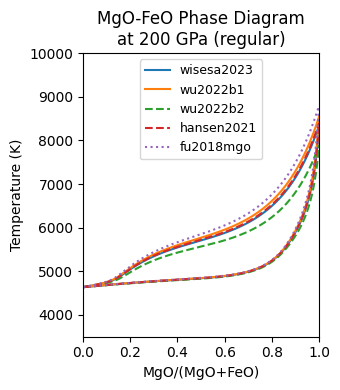

doing wisesa2023 and dobro2023
doing wu2022b1 and dobro2023
doing wu2022b2 and dobro2023
doing hansen2021 and dobro2023
doing fu2018mgo and dobro2023


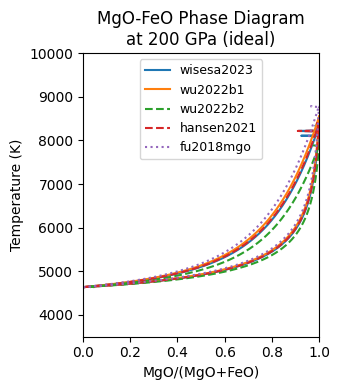

doing wisesa2023 and dobro2023
doing wu2022b1 and dobro2023
doing wu2022b2 and dobro2023
doing hansen2021 and dobro2023
doing fu2018mgo and dobro2023


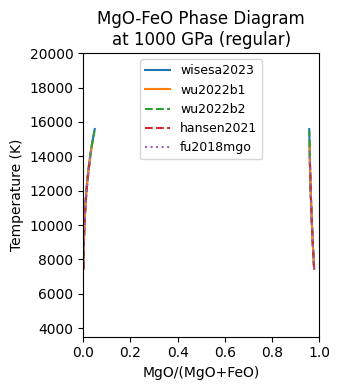

doing wisesa2023 and dobro2023
doing wu2022b1 and dobro2023
doing wu2022b2 and dobro2023
doing hansen2021 and dobro2023
doing fu2018mgo and dobro2023


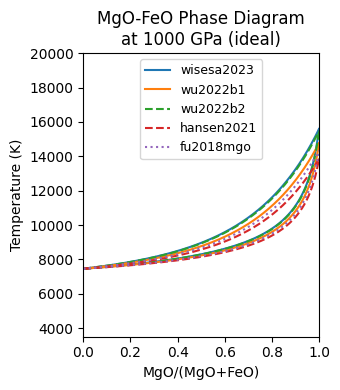

In [9]:
mgomethod_mainlist = ['wisesa2023', 'wu2022b1', 'wu2022b2', 'hansen2021', 'fu2018mgo']
feomethod_mainlist = ['fu2024', 'dobro2023', 'morard2022', 'fu2018feo']

# 200GPa and non-ideal
pressure = 200
compute = True
ideal = False
plot = True
mgomethod_list = mgomethod_mainlist
feomethod_list = ['dobro2023']
assert len(mgomethod_list) == 1 or len(feomethod_list) == 1
if compute:
  TmeltMgO_list, TmeltFeO_list, deltaHMgO_list, deltaHFeO_list, Wliquid_list, Wsolid_list, T_range_list, liquidus_list, \
    solidus_list, method_fix = computePhaseDiagramAll(pressure, meltingmethodMgO=mgomethod_list, meltingmethodFeO=feomethod_list, ideal=ideal)
if plot:
  plotPhaseDiagramAll(pressure, mgomethod_list, feomethod_list, T_range_list, liquidus_list, solidus_list, method_fix, ideal, 3500, 10000, '200regular_dobro.png')

# 200GPa and ideal
pressure = 200
compute = True
ideal = True
plot = True
mgomethod_list = mgomethod_mainlist
feomethod_list = ['dobro2023']
assert len(mgomethod_list) == 1 or len(feomethod_list) == 1
if compute:
  TmeltMgO_list, TmeltFeO_list, deltaHMgO_list, deltaHFeO_list, Wliquid_list, Wsolid_list, T_range_list, liquidus_list, \
    solidus_list, method_fix = computePhaseDiagramAll(pressure, meltingmethodMgO=mgomethod_list, meltingmethodFeO=feomethod_list, ideal=ideal)
if plot:
  plotPhaseDiagramAll(pressure, mgomethod_list, feomethod_list, T_range_list, liquidus_list, solidus_list, method_fix, ideal, 3500, 10000, '200ideal_dobro.png')

# 1000GPa and non-ideal
pressure = 1000
compute = True
ideal = False
plot = True
mgomethod_list = mgomethod_mainlist
feomethod_list = ['dobro2023']
assert len(mgomethod_list) == 1 or len(feomethod_list) == 1
if compute:
  TmeltMgO_list, TmeltFeO_list, deltaHMgO_list, deltaHFeO_list, Wliquid_list, Wsolid_list, T_range_list, liquidus_list, \
    solidus_list, method_fix = computePhaseDiagramAll(pressure, meltingmethodMgO=mgomethod_list, meltingmethodFeO=feomethod_list, ideal=ideal)
if plot:
  plotPhaseDiagramAll(pressure, mgomethod_list, feomethod_list, T_range_list, liquidus_list, solidus_list, method_fix, ideal, 3500, 20000, '1000regular_dobro.png')

# 1000GPa and ideal
pressure = 1000
compute = True
ideal = True
plot = True
mgomethod_list = mgomethod_mainlist
feomethod_list = ['dobro2023']
assert len(mgomethod_list) == 1 or len(feomethod_list) == 1
if compute:
  TmeltMgO_list, TmeltFeO_list, deltaHMgO_list, deltaHFeO_list, Wliquid_list, Wsolid_list, T_range_list, liquidus_list, \
    solidus_list, method_fix = computePhaseDiagramAll(pressure, meltingmethodMgO=mgomethod_list, meltingmethodFeO=feomethod_list, ideal=ideal)
if plot:
  plotPhaseDiagramAll(pressure, mgomethod_list, feomethod_list, T_range_list, liquidus_list, solidus_list, method_fix, ideal, 3500, 20000, '1000ideal_dobro.png')

# produce figures 1(c), 1(d), 2(c), 2(d) of my report

doing wu2022b1 and fu2024


<ipython-input-8-2f2f676585c2>:130: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  Xliquid, Xsolid = fsolve(phaseDiagram, guess, args=(T, TmeltMgO, TmeltFeO, deltaHMgO, deltaHFeO, Wliquid, Wsolid))
<ipython-input-8-2f2f676585c2>:112: RuntimeWarning: invalid value encountered in log
  eq2 = deltaHMgO*(1-T/TmeltMgO) + Wliquid*(1-Xliquid)**2 - Wsolid*(1-Xsolid)**2 + R*T*np.log(Xliquid/Xsolid)
<ipython-input-8-2f2f676585c2>:111: RuntimeWarning: invalid value encountered in log
  eq1 = deltaHFeO*(1-T/TmeltFeO) + Wliquid*(Xliquid)**2 - Wsolid*(Xsolid)**2 + R*T*np.log((1-Xliquid)/(1-Xsolid))


doing wu2022b1 and dobro2023


<ipython-input-8-2f2f676585c2>:130: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  Xliquid, Xsolid = fsolve(phaseDiagram, guess, args=(T, TmeltMgO, TmeltFeO, deltaHMgO, deltaHFeO, Wliquid, Wsolid))


doing wu2022b1 and morard2022
doing wu2022b1 and fu2018feo


<ipython-input-8-2f2f676585c2>:130: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  Xliquid, Xsolid = fsolve(phaseDiagram, guess, args=(T, TmeltMgO, TmeltFeO, deltaHMgO, deltaHFeO, Wliquid, Wsolid))


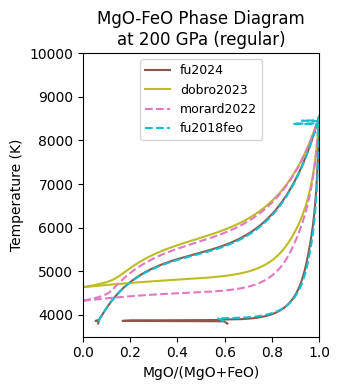

doing wu2022b1 and fu2024
doing wu2022b1 and dobro2023
doing wu2022b1 and morard2022
doing wu2022b1 and fu2018feo


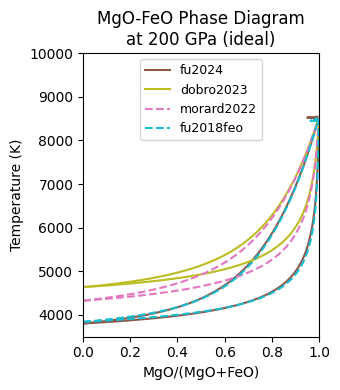

doing wu2022b1 and fu2024
doing wu2022b1 and dobro2023
doing wu2022b1 and morard2022
doing wu2022b1 and fu2018feo


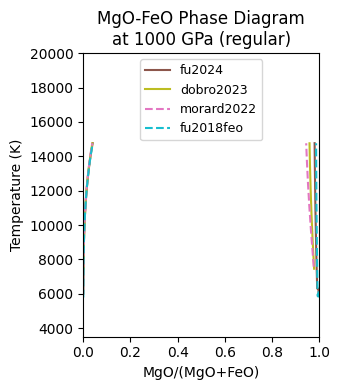

doing wu2022b1 and fu2024
doing wu2022b1 and dobro2023
doing wu2022b1 and morard2022
doing wu2022b1 and fu2018feo


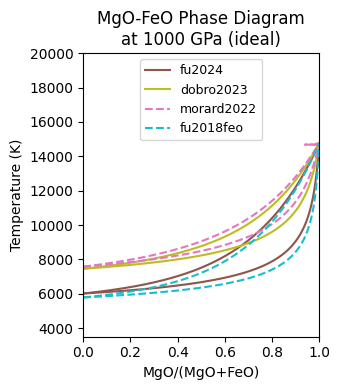

In [10]:
mgomethod_mainlist = ['wisesa2023', 'wu2022b1', 'wu2022b2', 'hansen2021', 'fu2018mgo']
feomethod_mainlist = ['fu2024', 'dobro2023', 'morard2022', 'fu2018feo']

# 200GPa and non-ideal
pressure = 200
compute = True
ideal = False
plot = True
mgomethod_list = ['wu2022b1']
feomethod_list = feomethod_mainlist
assert len(mgomethod_list) == 1 or len(feomethod_list) == 1
if compute:
  TmeltMgO_list, TmeltFeO_list, deltaHMgO_list, deltaHFeO_list, Wliquid_list, Wsolid_list, T_range_list, liquidus_list, \
    solidus_list, method_fix = computePhaseDiagramAll(pressure, meltingmethodMgO=mgomethod_list, meltingmethodFeO=feomethod_list, ideal=ideal)
if plot:
  plotPhaseDiagramAll(pressure, mgomethod_list, feomethod_list, T_range_list, liquidus_list, solidus_list, method_fix, ideal, 3500, 10000, '200regular_wu.png')

# 200GPa and ideal
pressure = 200
compute = True
ideal = True
plot = True
mgomethod_list = ['wu2022b1']
feomethod_list = feomethod_mainlist
assert len(mgomethod_list) == 1 or len(feomethod_list) == 1
if compute:
  TmeltMgO_list, TmeltFeO_list, deltaHMgO_list, deltaHFeO_list, Wliquid_list, Wsolid_list, T_range_list, liquidus_list, \
    solidus_list, method_fix = computePhaseDiagramAll(pressure, meltingmethodMgO=mgomethod_list, meltingmethodFeO=feomethod_list, ideal=ideal)
if plot:
  plotPhaseDiagramAll(pressure, mgomethod_list, feomethod_list, T_range_list, liquidus_list, solidus_list, method_fix, ideal, 3500, 10000, '200ideal_wu.png')

# 1000GPa and non-ideal
pressure = 1000
compute = True
ideal = False
plot = True
mgomethod_list = ['wu2022b1']
feomethod_list = feomethod_mainlist
assert len(mgomethod_list) == 1 or len(feomethod_list) == 1
if compute:
  TmeltMgO_list, TmeltFeO_list, deltaHMgO_list, deltaHFeO_list, Wliquid_list, Wsolid_list, T_range_list, liquidus_list, \
    solidus_list, method_fix = computePhaseDiagramAll(pressure, meltingmethodMgO=mgomethod_list, meltingmethodFeO=feomethod_list, ideal=ideal)
if plot:
  plotPhaseDiagramAll(pressure, mgomethod_list, feomethod_list, T_range_list, liquidus_list, solidus_list, method_fix, ideal, 3500, 20000, '1000regular_wu.png')

# 1000GPa and ideal
pressure = 1000
compute = True
ideal = True
plot = True
mgomethod_list = ['wu2022b1']
feomethod_list = feomethod_mainlist
assert len(mgomethod_list) == 1 or len(feomethod_list) == 1
if compute:
  TmeltMgO_list, TmeltFeO_list, deltaHMgO_list, deltaHFeO_list, Wliquid_list, Wsolid_list, T_range_list, liquidus_list, \
    solidus_list, method_fix = computePhaseDiagramAll(pressure, meltingmethodMgO=mgomethod_list, meltingmethodFeO=feomethod_list, ideal=ideal)
if plot:
  plotPhaseDiagramAll(pressure, mgomethod_list, feomethod_list, T_range_list, liquidus_list, solidus_list, method_fix, ideal, 3500, 20000, '1000ideal_wu.png')

# 200GPa & non-ideal: fixed feo and different mgo melting curves





doing wisesa2023 and fu2024


<ipython-input-8-2f2f676585c2>:130: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  Xliquid, Xsolid = fsolve(phaseDiagram, guess, args=(T, TmeltMgO, TmeltFeO, deltaHMgO, deltaHFeO, Wliquid, Wsolid))
<ipython-input-8-2f2f676585c2>:111: RuntimeWarning: invalid value encountered in log
  eq1 = deltaHFeO*(1-T/TmeltFeO) + Wliquid*(Xliquid)**2 - Wsolid*(Xsolid)**2 + R*T*np.log((1-Xliquid)/(1-Xsolid))


doing wu2022b1 and fu2024


<ipython-input-8-2f2f676585c2>:112: RuntimeWarning: invalid value encountered in log
  eq2 = deltaHMgO*(1-T/TmeltMgO) + Wliquid*(1-Xliquid)**2 - Wsolid*(1-Xsolid)**2 + R*T*np.log(Xliquid/Xsolid)


doing wu2022b2 and fu2024
doing hansen2021 and fu2024


<ipython-input-8-2f2f676585c2>:130: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  Xliquid, Xsolid = fsolve(phaseDiagram, guess, args=(T, TmeltMgO, TmeltFeO, deltaHMgO, deltaHFeO, Wliquid, Wsolid))


doing fu2018mgo and fu2024


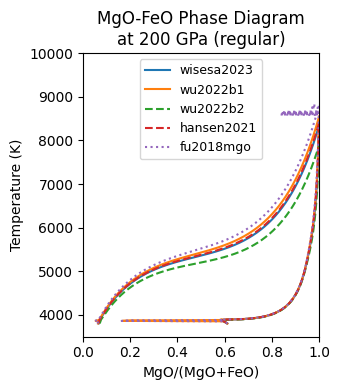

doing wisesa2023 and dobro2023
doing wu2022b1 and dobro2023


<ipython-input-8-2f2f676585c2>:130: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  Xliquid, Xsolid = fsolve(phaseDiagram, guess, args=(T, TmeltMgO, TmeltFeO, deltaHMgO, deltaHFeO, Wliquid, Wsolid))


doing wu2022b2 and dobro2023
doing hansen2021 and dobro2023
doing fu2018mgo and dobro2023


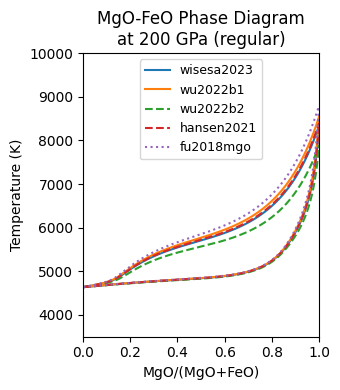

doing wisesa2023 and morard2022
doing wu2022b1 and morard2022
doing wu2022b2 and morard2022
doing hansen2021 and morard2022
doing fu2018mgo and morard2022


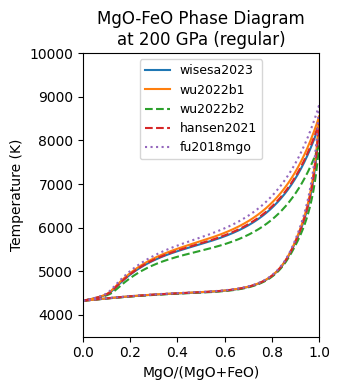

doing wisesa2023 and fu2018feo
doing wu2022b1 and fu2018feo
doing wu2022b2 and fu2018feo
doing hansen2021 and fu2018feo
doing fu2018mgo and fu2018feo


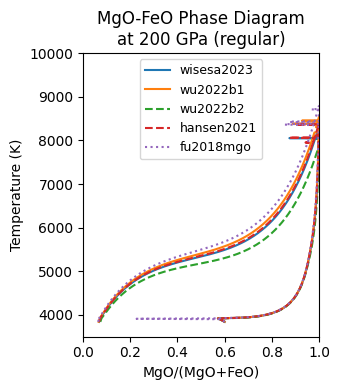

In [11]:
mgomethod_mainlist = ['wisesa2023', 'wu2022b1', 'wu2022b2', 'hansen2021', 'fu2018mgo']
feomethod_mainlist = ['fu2024', 'dobro2023', 'morard2022', 'fu2018feo']
pressure = 200
compute = True
ideal = False
plot = True
for i, method in enumerate(feomethod_mainlist):
  mgomethod_list = mgomethod_mainlist
  feomethod_list = [method]
  assert len(mgomethod_list) == 1 or len(feomethod_list) == 1
  if compute:
    TmeltMgO_list, TmeltFeO_list, deltaHMgO_list, deltaHFeO_list, Wliquid_list, Wsolid_list, T_range_list, liquidus_list, \
      solidus_list, method_fix = computePhaseDiagramAll(pressure, meltingmethodMgO=mgomethod_list, meltingmethodFeO=feomethod_list, ideal=ideal)
  if plot:
    plotPhaseDiagramAll(pressure, mgomethod_list, feomethod_list, T_range_list, liquidus_list, solidus_list, method_fix, ideal, 3500, 10000)

# 200GPa & non-ideal: fixed mgo and different feo melting curves

doing wisesa2023 and fu2024


<ipython-input-8-2f2f676585c2>:130: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  Xliquid, Xsolid = fsolve(phaseDiagram, guess, args=(T, TmeltMgO, TmeltFeO, deltaHMgO, deltaHFeO, Wliquid, Wsolid))
<ipython-input-8-2f2f676585c2>:111: RuntimeWarning: invalid value encountered in log
  eq1 = deltaHFeO*(1-T/TmeltFeO) + Wliquid*(Xliquid)**2 - Wsolid*(Xsolid)**2 + R*T*np.log((1-Xliquid)/(1-Xsolid))


doing wisesa2023 and dobro2023
doing wisesa2023 and morard2022


<ipython-input-8-2f2f676585c2>:130: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  Xliquid, Xsolid = fsolve(phaseDiagram, guess, args=(T, TmeltMgO, TmeltFeO, deltaHMgO, deltaHFeO, Wliquid, Wsolid))


doing wisesa2023 and fu2018feo


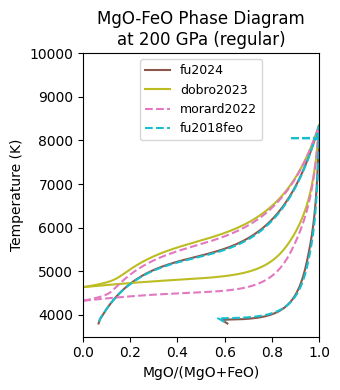

doing wu2022b1 and fu2024


<ipython-input-8-2f2f676585c2>:112: RuntimeWarning: invalid value encountered in log
  eq2 = deltaHMgO*(1-T/TmeltMgO) + Wliquid*(1-Xliquid)**2 - Wsolid*(1-Xsolid)**2 + R*T*np.log(Xliquid/Xsolid)


doing wu2022b1 and dobro2023
doing wu2022b1 and morard2022
doing wu2022b1 and fu2018feo


<ipython-input-8-2f2f676585c2>:130: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  Xliquid, Xsolid = fsolve(phaseDiagram, guess, args=(T, TmeltMgO, TmeltFeO, deltaHMgO, deltaHFeO, Wliquid, Wsolid))


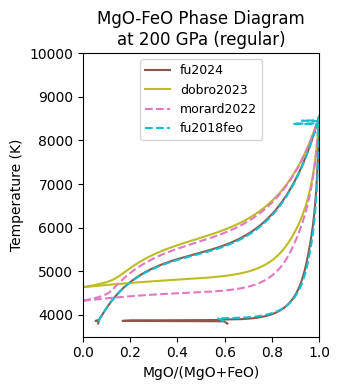

doing wu2022b2 and fu2024
doing wu2022b2 and dobro2023
doing wu2022b2 and morard2022
doing wu2022b2 and fu2018feo


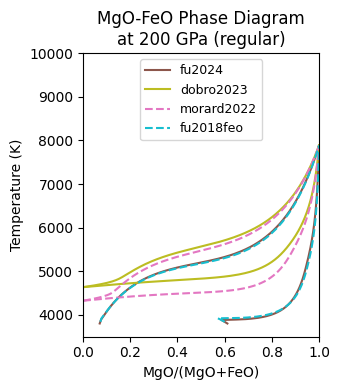

doing hansen2021 and fu2024
doing hansen2021 and dobro2023
doing hansen2021 and morard2022
doing hansen2021 and fu2018feo


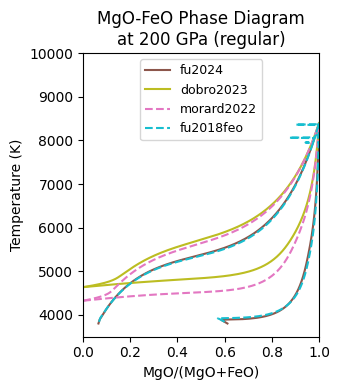

doing fu2018mgo and fu2024
doing fu2018mgo and dobro2023
doing fu2018mgo and morard2022
doing fu2018mgo and fu2018feo


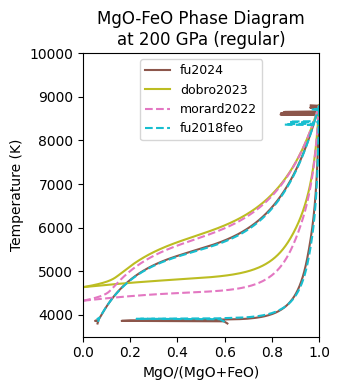

In [12]:
mgomethod_mainlist = ['wisesa2023', 'wu2022b1', 'wu2022b2', 'hansen2021', 'fu2018mgo']
feomethod_mainlist = ['fu2024', 'dobro2023', 'morard2022', 'fu2018feo']
pressure = 200
compute = True
ideal = False
plot = True
for i, method in enumerate(mgomethod_mainlist):
  mgomethod_list = [method]
  feomethod_list = feomethod_mainlist
  assert len(mgomethod_list) == 1 or len(feomethod_list) == 1
  if compute:
    TmeltMgO_list, TmeltFeO_list, deltaHMgO_list, deltaHFeO_list, Wliquid_list, Wsolid_list, T_range_list, liquidus_list, \
      solidus_list, method_fix = computePhaseDiagramAll(pressure, meltingmethodMgO=mgomethod_list, meltingmethodFeO=feomethod_list, ideal=ideal)
  if plot:
    plotPhaseDiagramAll(pressure, mgomethod_list, feomethod_list, T_range_list, liquidus_list, solidus_list, method_fix, ideal, 3500, 10000)

# 200GPa & ideal: fixed feo and different mgo melting curves

doing wisesa2023 and fu2024


<ipython-input-8-2f2f676585c2>:112: RuntimeWarning: invalid value encountered in log
  eq2 = deltaHMgO*(1-T/TmeltMgO) + Wliquid*(1-Xliquid)**2 - Wsolid*(1-Xsolid)**2 + R*T*np.log(Xliquid/Xsolid)
<ipython-input-8-2f2f676585c2>:130: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  Xliquid, Xsolid = fsolve(phaseDiagram, guess, args=(T, TmeltMgO, TmeltFeO, deltaHMgO, deltaHFeO, Wliquid, Wsolid))
<ipython-input-8-2f2f676585c2>:111: RuntimeWarning: invalid value encountered in log
  eq1 = deltaHFeO*(1-T/TmeltFeO) + Wliquid*(Xliquid)**2 - Wsolid*(Xsolid)**2 + R*T*np.log((1-Xliquid)/(1-Xsolid))


doing wu2022b1 and fu2024
doing wu2022b2 and fu2024
doing hansen2021 and fu2024
doing fu2018mgo and fu2024


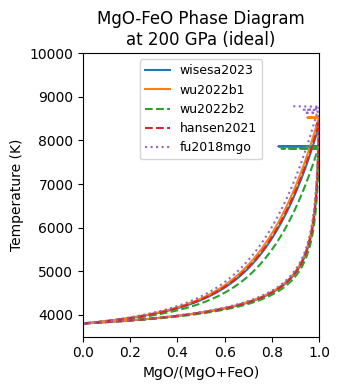

doing wisesa2023 and dobro2023
doing wu2022b1 and dobro2023
doing wu2022b2 and dobro2023
doing hansen2021 and dobro2023
doing fu2018mgo and dobro2023


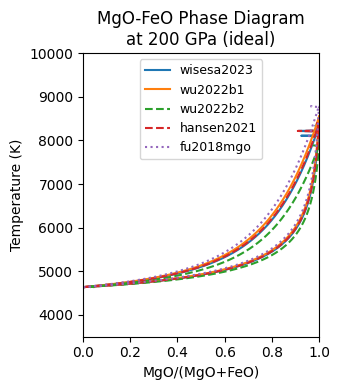

doing wisesa2023 and morard2022
doing wu2022b1 and morard2022
doing wu2022b2 and morard2022
doing hansen2021 and morard2022
doing fu2018mgo and morard2022


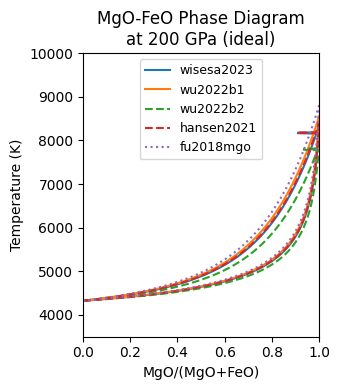

doing wisesa2023 and fu2018feo
doing wu2022b1 and fu2018feo
doing wu2022b2 and fu2018feo
doing hansen2021 and fu2018feo
doing fu2018mgo and fu2018feo


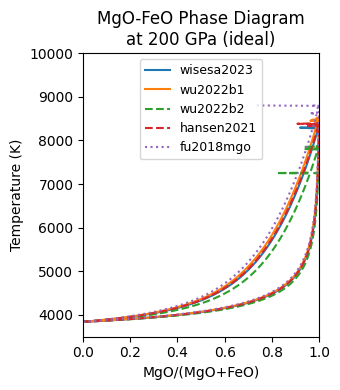

In [13]:
mgomethod_mainlist = ['wisesa2023', 'wu2022b1', 'wu2022b2', 'hansen2021', 'fu2018mgo']
feomethod_mainlist = ['fu2024', 'dobro2023', 'morard2022', 'fu2018feo']
pressure = 200
compute = True
ideal = True
plot = True
for i, method in enumerate(feomethod_mainlist):
  mgomethod_list = mgomethod_mainlist
  feomethod_list = [method]
  assert len(mgomethod_list) == 1 or len(feomethod_list) == 1
  if compute:
    TmeltMgO_list, TmeltFeO_list, deltaHMgO_list, deltaHFeO_list, Wliquid_list, Wsolid_list, T_range_list, liquidus_list, \
      solidus_list, method_fix = computePhaseDiagramAll(pressure, meltingmethodMgO=mgomethod_list, meltingmethodFeO=feomethod_list, ideal=ideal)
  if plot:
    plotPhaseDiagramAll(pressure, mgomethod_list, feomethod_list, T_range_list, liquidus_list, solidus_list, method_fix, ideal, 3500, 10000)

# 200GPa & ideal: fixed mgo and different feo melting curves

doing wisesa2023 and fu2024


<ipython-input-8-2f2f676585c2>:112: RuntimeWarning: invalid value encountered in log
  eq2 = deltaHMgO*(1-T/TmeltMgO) + Wliquid*(1-Xliquid)**2 - Wsolid*(1-Xsolid)**2 + R*T*np.log(Xliquid/Xsolid)
<ipython-input-8-2f2f676585c2>:130: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  Xliquid, Xsolid = fsolve(phaseDiagram, guess, args=(T, TmeltMgO, TmeltFeO, deltaHMgO, deltaHFeO, Wliquid, Wsolid))
<ipython-input-8-2f2f676585c2>:111: RuntimeWarning: invalid value encountered in log
  eq1 = deltaHFeO*(1-T/TmeltFeO) + Wliquid*(Xliquid)**2 - Wsolid*(Xsolid)**2 + R*T*np.log((1-Xliquid)/(1-Xsolid))


doing wisesa2023 and dobro2023
doing wisesa2023 and morard2022
doing wisesa2023 and fu2018feo


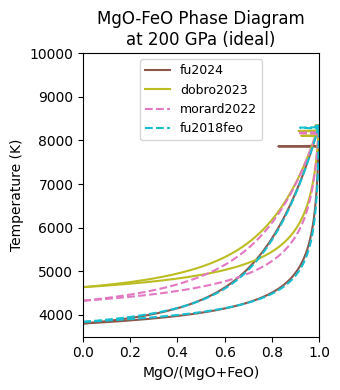

doing wu2022b1 and fu2024
doing wu2022b1 and dobro2023
doing wu2022b1 and morard2022
doing wu2022b1 and fu2018feo


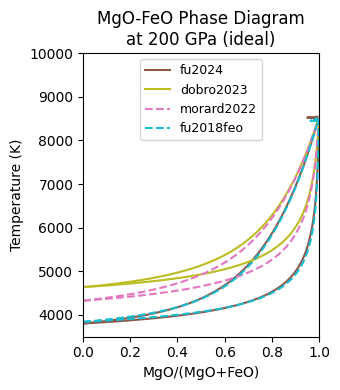

doing wu2022b2 and fu2024
doing wu2022b2 and dobro2023
doing wu2022b2 and morard2022
doing wu2022b2 and fu2018feo


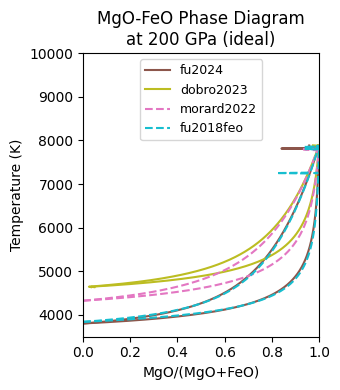

doing hansen2021 and fu2024
doing hansen2021 and dobro2023
doing hansen2021 and morard2022
doing hansen2021 and fu2018feo


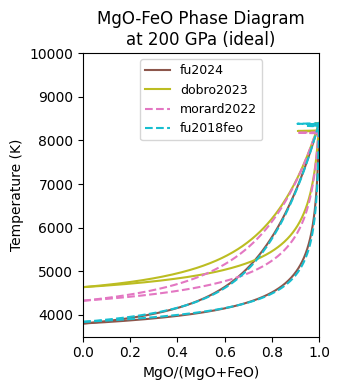

doing fu2018mgo and fu2024
doing fu2018mgo and dobro2023
doing fu2018mgo and morard2022
doing fu2018mgo and fu2018feo


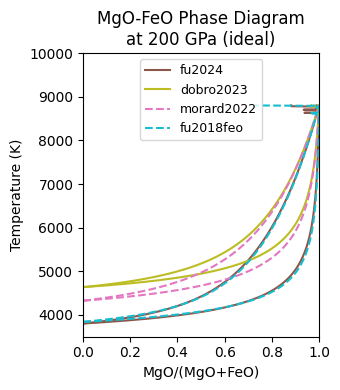

In [14]:
mgomethod_mainlist = ['wisesa2023', 'wu2022b1', 'wu2022b2', 'hansen2021', 'fu2018mgo']
feomethod_mainlist = ['fu2024', 'dobro2023', 'morard2022', 'fu2018feo']
pressure = 200
compute = True
ideal = True
plot = True
for i, method in enumerate(mgomethod_mainlist):
  mgomethod_list = [method]
  feomethod_list = feomethod_mainlist
  assert len(mgomethod_list) == 1 or len(feomethod_list) == 1
  if compute:
    TmeltMgO_list, TmeltFeO_list, deltaHMgO_list, deltaHFeO_list, Wliquid_list, Wsolid_list, T_range_list, liquidus_list, \
      solidus_list, method_fix = computePhaseDiagramAll(pressure, meltingmethodMgO=mgomethod_list, meltingmethodFeO=feomethod_list, ideal=ideal)
  if plot:
    plotPhaseDiagramAll(pressure, mgomethod_list, feomethod_list, T_range_list, liquidus_list, solidus_list, method_fix, ideal, 3500, 10000)

# 1000GPa & non-ideal: fixed feo and different mgo melting curves

doing wisesa2023 and fu2024


<ipython-input-8-2f2f676585c2>:112: RuntimeWarning: invalid value encountered in log
  eq2 = deltaHMgO*(1-T/TmeltMgO) + Wliquid*(1-Xliquid)**2 - Wsolid*(1-Xsolid)**2 + R*T*np.log(Xliquid/Xsolid)
<ipython-input-8-2f2f676585c2>:130: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  Xliquid, Xsolid = fsolve(phaseDiagram, guess, args=(T, TmeltMgO, TmeltFeO, deltaHMgO, deltaHFeO, Wliquid, Wsolid))


doing wu2022b1 and fu2024
doing wu2022b2 and fu2024
doing hansen2021 and fu2024
doing fu2018mgo and fu2024


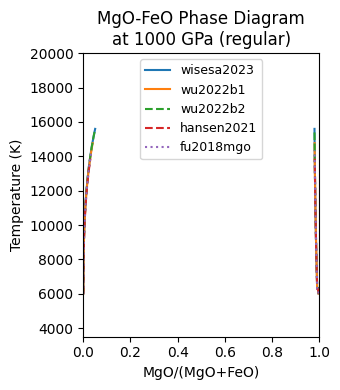

doing wisesa2023 and dobro2023
doing wu2022b1 and dobro2023
doing wu2022b2 and dobro2023
doing hansen2021 and dobro2023
doing fu2018mgo and dobro2023


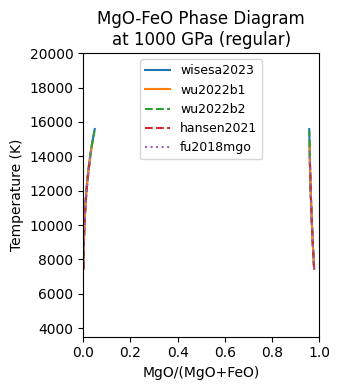

doing wisesa2023 and morard2022
doing wu2022b1 and morard2022
doing wu2022b2 and morard2022
doing hansen2021 and morard2022
doing fu2018mgo and morard2022


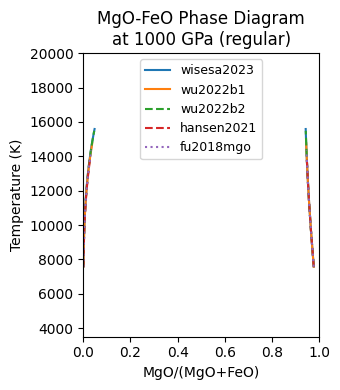

doing wisesa2023 and fu2018feo
doing wu2022b1 and fu2018feo
doing wu2022b2 and fu2018feo
doing hansen2021 and fu2018feo
doing fu2018mgo and fu2018feo


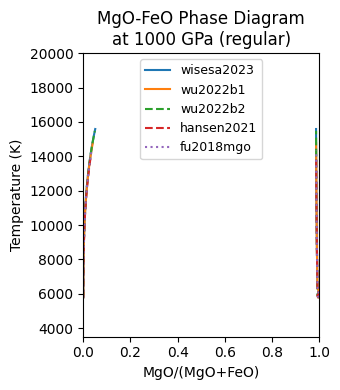

In [15]:
mgomethod_mainlist = ['wisesa2023', 'wu2022b1', 'wu2022b2', 'hansen2021', 'fu2018mgo']
feomethod_mainlist = ['fu2024', 'dobro2023', 'morard2022', 'fu2018feo']
pressure = 1000
compute = True
ideal = False
plot = True
for i, method in enumerate(feomethod_mainlist):
  mgomethod_list = mgomethod_mainlist
  feomethod_list = [method]
  assert len(mgomethod_list) == 1 or len(feomethod_list) == 1
  if compute:
    TmeltMgO_list, TmeltFeO_list, deltaHMgO_list, deltaHFeO_list, Wliquid_list, Wsolid_list, T_range_list, liquidus_list, \
      solidus_list, method_fix = computePhaseDiagramAll(pressure, meltingmethodMgO=mgomethod_list, meltingmethodFeO=feomethod_list, ideal=ideal)
  if plot:
    plotPhaseDiagramAll(pressure, mgomethod_list, feomethod_list, T_range_list, liquidus_list, solidus_list, method_fix, ideal, 3500, 20000)

# 1000GPa & non-ideal: fixed mgo and different feo melting curves

doing wisesa2023 and fu2024


<ipython-input-8-2f2f676585c2>:112: RuntimeWarning: invalid value encountered in log
  eq2 = deltaHMgO*(1-T/TmeltMgO) + Wliquid*(1-Xliquid)**2 - Wsolid*(1-Xsolid)**2 + R*T*np.log(Xliquid/Xsolid)
<ipython-input-8-2f2f676585c2>:130: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  Xliquid, Xsolid = fsolve(phaseDiagram, guess, args=(T, TmeltMgO, TmeltFeO, deltaHMgO, deltaHFeO, Wliquid, Wsolid))


doing wisesa2023 and dobro2023
doing wisesa2023 and morard2022
doing wisesa2023 and fu2018feo


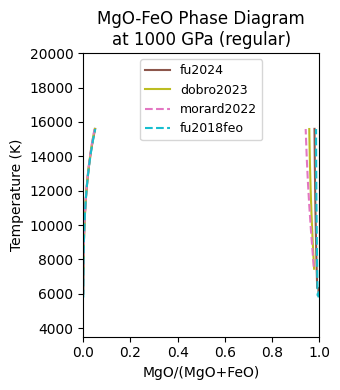

doing wu2022b1 and fu2024
doing wu2022b1 and dobro2023
doing wu2022b1 and morard2022
doing wu2022b1 and fu2018feo


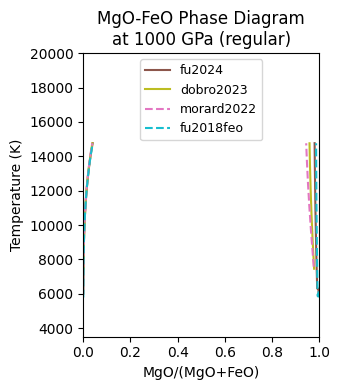

doing wu2022b2 and fu2024
doing wu2022b2 and dobro2023
doing wu2022b2 and morard2022
doing wu2022b2 and fu2018feo


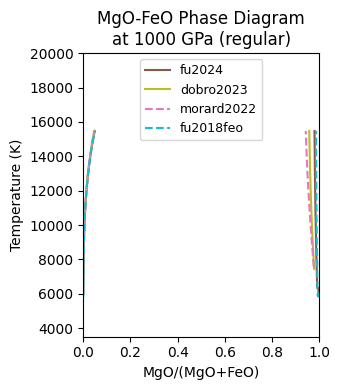

doing hansen2021 and fu2024
doing hansen2021 and dobro2023
doing hansen2021 and morard2022
doing hansen2021 and fu2018feo


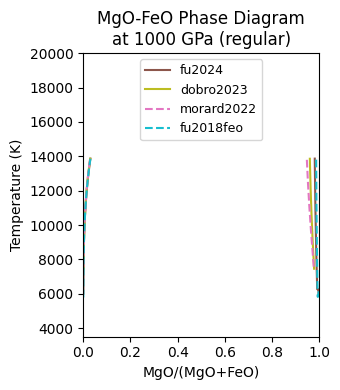

doing fu2018mgo and fu2024
doing fu2018mgo and dobro2023
doing fu2018mgo and morard2022
doing fu2018mgo and fu2018feo


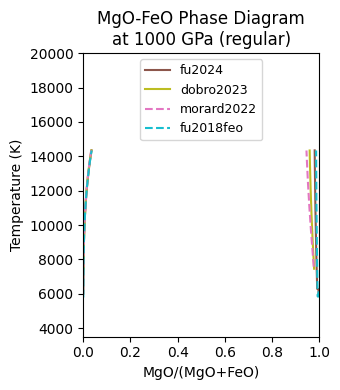

In [16]:
mgomethod_mainlist = ['wisesa2023', 'wu2022b1', 'wu2022b2', 'hansen2021', 'fu2018mgo']
feomethod_mainlist = ['fu2024', 'dobro2023', 'morard2022', 'fu2018feo']
pressure = 1000
compute = True
ideal = False
plot = True
for i, method in enumerate(mgomethod_mainlist):
  mgomethod_list = [method]
  feomethod_list = feomethod_mainlist
  assert len(mgomethod_list) == 1 or len(feomethod_list) == 1
  if compute:
    TmeltMgO_list, TmeltFeO_list, deltaHMgO_list, deltaHFeO_list, Wliquid_list, Wsolid_list, T_range_list, liquidus_list, \
      solidus_list, method_fix = computePhaseDiagramAll(pressure, meltingmethodMgO=mgomethod_list, meltingmethodFeO=feomethod_list, ideal=ideal)
  if plot:
    plotPhaseDiagramAll(pressure, mgomethod_list, feomethod_list, T_range_list, liquidus_list, solidus_list, method_fix, ideal, 3500, 20000)

# 1000GPa & ideal: fixed feo and different mgo melting curves

doing wisesa2023 and fu2024


<ipython-input-8-2f2f676585c2>:112: RuntimeWarning: invalid value encountered in log
  eq2 = deltaHMgO*(1-T/TmeltMgO) + Wliquid*(1-Xliquid)**2 - Wsolid*(1-Xsolid)**2 + R*T*np.log(Xliquid/Xsolid)
<ipython-input-8-2f2f676585c2>:130: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  Xliquid, Xsolid = fsolve(phaseDiagram, guess, args=(T, TmeltMgO, TmeltFeO, deltaHMgO, deltaHFeO, Wliquid, Wsolid))
<ipython-input-8-2f2f676585c2>:111: RuntimeWarning: invalid value encountered in log
  eq1 = deltaHFeO*(1-T/TmeltFeO) + Wliquid*(Xliquid)**2 - Wsolid*(Xsolid)**2 + R*T*np.log((1-Xliquid)/(1-Xsolid))


doing wu2022b1 and fu2024
doing wu2022b2 and fu2024
doing hansen2021 and fu2024
doing fu2018mgo and fu2024


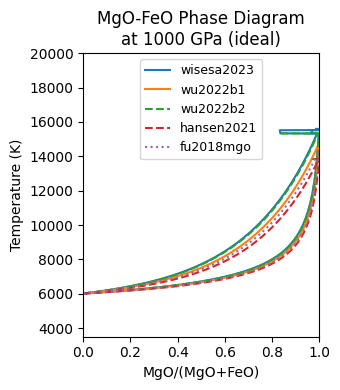

doing wisesa2023 and dobro2023
doing wu2022b1 and dobro2023
doing wu2022b2 and dobro2023
doing hansen2021 and dobro2023
doing fu2018mgo and dobro2023


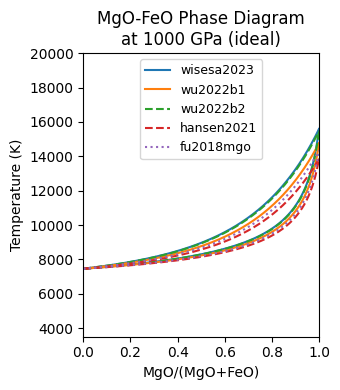

doing wisesa2023 and morard2022
doing wu2022b1 and morard2022
doing wu2022b2 and morard2022
doing hansen2021 and morard2022
doing fu2018mgo and morard2022


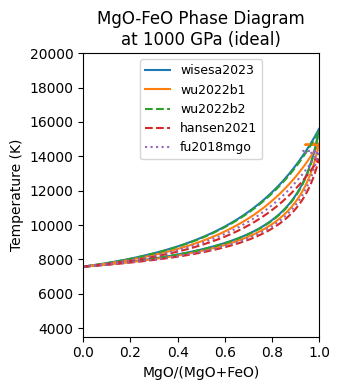

doing wisesa2023 and fu2018feo
doing wu2022b1 and fu2018feo
doing wu2022b2 and fu2018feo
doing hansen2021 and fu2018feo
doing fu2018mgo and fu2018feo


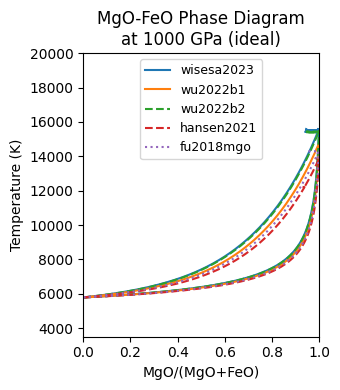

In [17]:
mgomethod_mainlist = ['wisesa2023', 'wu2022b1', 'wu2022b2', 'hansen2021', 'fu2018mgo']
feomethod_mainlist = ['fu2024', 'dobro2023', 'morard2022', 'fu2018feo']
pressure = 1000
compute = True
ideal = True
plot = True
for i, method in enumerate(feomethod_mainlist):
  mgomethod_list = mgomethod_mainlist
  feomethod_list = [method]
  assert len(mgomethod_list) == 1 or len(feomethod_list) == 1
  if compute:
    TmeltMgO_list, TmeltFeO_list, deltaHMgO_list, deltaHFeO_list, Wliquid_list, Wsolid_list, T_range_list, liquidus_list, \
      solidus_list, method_fix = computePhaseDiagramAll(pressure, meltingmethodMgO=mgomethod_list, meltingmethodFeO=feomethod_list, ideal=ideal)
  if plot:
    plotPhaseDiagramAll(pressure, mgomethod_list, feomethod_list, T_range_list, liquidus_list, solidus_list, method_fix, ideal, 3500, 20000)

# 1000GPa & ideal: fixed mgo and different feo melting curves

doing wisesa2023 and fu2024


<ipython-input-8-2f2f676585c2>:112: RuntimeWarning: invalid value encountered in log
  eq2 = deltaHMgO*(1-T/TmeltMgO) + Wliquid*(1-Xliquid)**2 - Wsolid*(1-Xsolid)**2 + R*T*np.log(Xliquid/Xsolid)
<ipython-input-8-2f2f676585c2>:130: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  Xliquid, Xsolid = fsolve(phaseDiagram, guess, args=(T, TmeltMgO, TmeltFeO, deltaHMgO, deltaHFeO, Wliquid, Wsolid))
<ipython-input-8-2f2f676585c2>:111: RuntimeWarning: invalid value encountered in log
  eq1 = deltaHFeO*(1-T/TmeltFeO) + Wliquid*(Xliquid)**2 - Wsolid*(Xsolid)**2 + R*T*np.log((1-Xliquid)/(1-Xsolid))


doing wisesa2023 and dobro2023
doing wisesa2023 and morard2022
doing wisesa2023 and fu2018feo


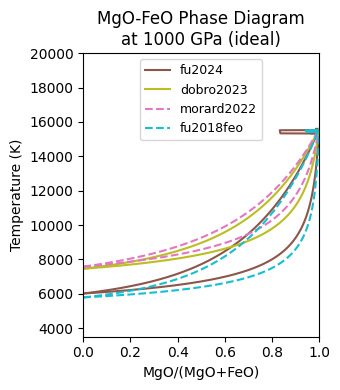

doing wu2022b1 and fu2024
doing wu2022b1 and dobro2023
doing wu2022b1 and morard2022
doing wu2022b1 and fu2018feo


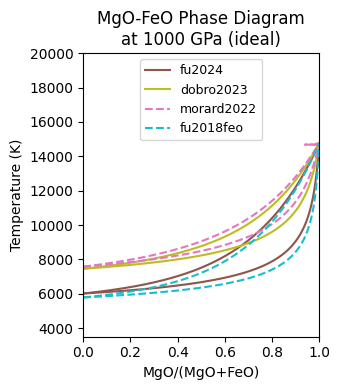

doing wu2022b2 and fu2024
doing wu2022b2 and dobro2023
doing wu2022b2 and morard2022
doing wu2022b2 and fu2018feo


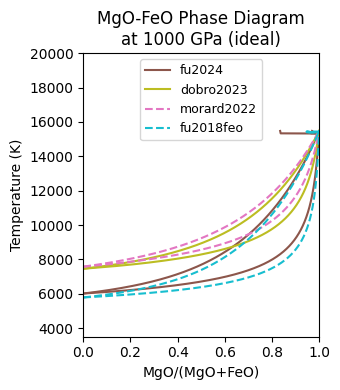

doing hansen2021 and fu2024
doing hansen2021 and dobro2023
doing hansen2021 and morard2022
doing hansen2021 and fu2018feo


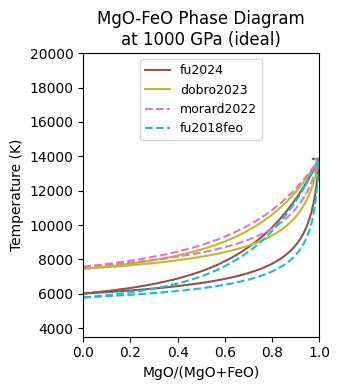

doing fu2018mgo and fu2024
doing fu2018mgo and dobro2023
doing fu2018mgo and morard2022
doing fu2018mgo and fu2018feo


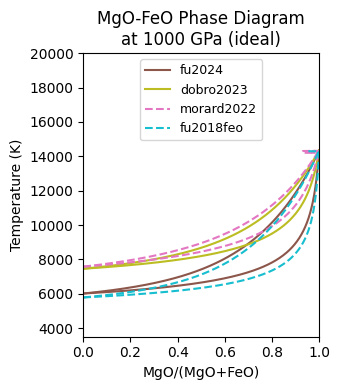

In [18]:
mgomethod_mainlist = ['wisesa2023', 'wu2022b1', 'wu2022b2', 'hansen2021', 'fu2018mgo']
feomethod_mainlist = ['fu2024', 'dobro2023', 'morard2022', 'fu2018feo']
pressure = 1000
compute = True
ideal = True
plot = True
for i, method in enumerate(mgomethod_mainlist):
  mgomethod_list = [method]
  feomethod_list = feomethod_mainlist
  assert len(mgomethod_list) == 1 or len(feomethod_list) == 1

  if compute:
    TmeltMgO_list, TmeltFeO_list, deltaHMgO_list, deltaHFeO_list, Wliquid_list, Wsolid_list, T_range_list, liquidus_list, \
      solidus_list, method_fix = computePhaseDiagramAll(pressure, meltingmethodMgO=mgomethod_list, meltingmethodFeO=feomethod_list, ideal=ideal)
  if plot:
    plotPhaseDiagramAll(pressure, mgomethod_list, feomethod_list, T_range_list, liquidus_list, solidus_list, method_fix, ideal, 3500, 20000)